## Rajesh's DS & AI Learning

# 1. Recap

In this mission, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. 

## TODO:
* Read unrate.csv into a DataFrame and assign to unrate.
* Use Pandas.to_datetime to convert the DATE column into a Series of datetime values.
* Generate a line chart that visualizes the unemployment rates from 1948:
  * x-values should be the first 12 values in the DATE column
  * y-values should be the first 12 values in the VALUE column
* Use pyplot.xticks() to rotate the x-axis tick labels by 90 degrees.
* Use pyplot.xlabel() to set the x-axis label to "Month".
* Use pyplot.ylabel() to set the y-axis label to "Unemployment Rate".
* Use pyplot.title() to set the plot title to "Monthly Unemployment Trends, 1948".
* Display the plot.

In [1]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

# Define the name of your CSV file
csv_filename = "unrate.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Move back to the grandparent directory (two levels up)
project_directory = os.path.dirname(os.path.dirname(current_directory))

# Navigate to the "datasets" folder
datasets_directory = os.path.join(project_directory, "DataSets")

# Construct the full path to your CSV file
csv_path = os.path.join(datasets_directory, csv_filename)

# Check if the file exists
if os.path.exists(csv_path):
    print("CSV file found at:", csv_path)
else:
    print("CSV file not found at:", csv_path)

# import data file
unrate=pd.read_csv(csv_path)

In [3]:
# Converts date column to datetime datatype

# unrate['DATE']=pd.to_datetime(unrate['DATE'])

In [4]:
month_12=unrate[0:12]

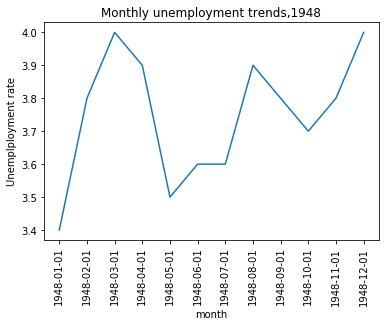

In [5]:
plt.plot(month_12['DATE'],month_12['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('Unemplployment rate')
plt.title('Monthly unemployment trends,1948')
plt.show()

# 2. Matplotlib Classes

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. `When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to`. This means we need to understand the `matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly`. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

* a container for all plots was created (returned as a Figure object)
* a container for the plot was positioned on a grid (the plot returned as an Axes object)
* visual symbols were added to the plot (using the Axes methods)

**A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container**

We can manually create a figure by calling pyplot.figure():

`fig = plt.figure()`

After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

* values on the x-axis and y-axis
* ticks on the x-axis and y-axis
* all visual symbols, such as:
  * markers
  * lines
  * gridlines


**While plots are represented using instances of the Axes class**, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object, which needs to be assigned to a variable:

`axes_obj = fig.add_subplot(nrows, ncols, plot_number)`

# 3. Matplotlib Classes

## TODO
* Use plt.figure() to create a figure and assign to fig.
* Use Figure.add_subplot() to create two subplots above and below each other
* Assign the top Axes object to ax1.
* Assign the bottom Axes object to ax2.
* Use plt.show() to display the resulting plot.

In [ ]:
fig=plt.figure()
ax_1=fig.add_subplot(2,1,1)
ax_2=fig.add_subplot(2,1,2)
plt.show()

# 4. Grid Positioning

When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.

In [ ]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/subplot_grid.png')

# 5. Adding Data

* To generate a line chart within an Axes object, we need to call `Axes.plot()` and pass in the data you want plotted:
* Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects.

## TODO:
* Create 2 line subplots in a 2 row by 1 column layout:

* In the top subplot, plot the data from 1948.
  * For the x-axis, use the first 12 values in the DATE column.
  * For the y-axis, use the first 12 values in the VALUE column.
* In the bottom subplot, plot the data from 1949.
  * For the x-axis, use the values from index 12 to 24 in the DATE column.
  * For the y-axis, use the values from index 12 to 24 in the VALUE column.
* Use plt.show() to display all the plots.

In [ ]:
year_1948=unrate[:12]
year_1949=unrate[12:24]

fig=plt.figure()
ax_1=fig.add_subplot(2,1,1)
ax_2=fig.add_subplot(2,1,2)
ax_1.plot(year_1948['DATE'],year_1948['VALUE'])

ax_2.plot(year_1949['DATE'],year_1949['VALUE'])
plt.show()

# 6. Formatting And Spacing

* One issue with the 2 plots is that the x-axis ticks labels are unreadable.
* The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same
 

* This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure.
* To tweak the dimensions of the plotting area, we need to use the figsize parameter when we call `plt.figure()`

`fig = plt.figure(figsize=(width, height))`

## TODO:
For the plot we generated above, set the width of the plotting area to 12 inches and the height to 5 inches.

In [ ]:
year_1948=unrate[:12]
year_1949=unrate[12:24]

fig=plt.figure(figsize=(12,5))
ax_1=fig.add_subplot(2,1,1)
ax_2=fig.add_subplot(2,1,2)
ax_1.plot(year_1948['DATE'],year_1948['VALUE'])

ax_2.plot(year_1949['DATE'],year_1949['VALUE'])
plt.show()

# 7. Comparing Across More Years

**Expanding the plotting area horizontally improved the readability of the x-axis tick labels and minimized the amount of space between the 2 line charts**.

 There's no changes in unemployment trends that are occurring in the same month in both years.

## TODO:
* Set the width of the plotting area to 12 inches and the height to 12 inches.
* Generate a grid with 5 rows and 1 column and plot data from the individual years. Start with 1948 in the top subplot and end with 1952 in the bottom subplot.
* Use plt.show() to display the plots.

In [ ]:
fig=plt.figure(figsize=(12,12))
for i in range(5):
    ax=fig.add_subplot(5,1,i+1)
    start_index=i*12
    end_index=(i+1)*12
    ax.plot(unrate['DATE'][start_index:end_index],unrate['VALUE'][start_index:end_index])
plt.show()

# 8. Overlaying Line Charts

`By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space,` which is a limitation that we experienced when scanning the table representation of the same data.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines

**To extract the month values from the DATE column and assign them to a new column, we can use the `pandas.Series.dt` accessor:**

Calling pandas.Series.dt.month returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.). Under the hood, pandas applies the datetime.date.month attribute from the datetime.date class over each datetime value in the DATE column, which returns the integer month value.

## TODO:
* Set the plotting area to a width of 6 inches and a height of 3 inches.
* Generate 2 line charts in the base subplot, using the MONTH column for the x-axis instead of the DATE column:

* One line chart using data from 1948, with the line color set to "red".
* One line chart using data from 1949, with the line color set to "blue".
* Use plt.show() to display the plots.

In [11]:
unrate["DATE"]=pd.to_datetime(unrate['DATE'])
unrate['MONTH']=unrate['DATE'].dt.month

In [ ]:
fig=plt.figure(figsize=(6,3))
plt.plot(unrate['MONTH'][0:12],unrate['VALUE'][0:12],c='red')
plt.plot(unrate['MONTH'][0:12],unrate['VALUE'][12:24],c='blue')
plt.show()

# 9. Adding More Lines

## TODO:
Let's visualize 5 years worth of unemployment rates on the same subplot.

* Set the plotting area to a width of 10 inches and a height of 6 inches.
Generate the following plots in the base subplot:

* 1948: set the line color to "red"
* 1949: set the line color to "blue"
* 1950: set the line color to "green"
* 1951: set the line color to "orange"
* 1952: set the line color to "black"
* Use plt.show() to display the plots.

In [ ]:
fig=plt.figure(figsize=(10,6))
colors=['red','blue','green','orange','black']
for i in range(5):
    start_index=i*12
    end_index=(i+1)*12
    plt.plot(unrate['MONTH'][start_index:end_index],unrate['VALUE'][start_index:end_index],c=colors[i])
plt.show()

# 10. Adding A Legend

 You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

`To help remind us which year each line corresponds to, we can add a legend that links each color to the year the line is representing`.

**We can create the legend using pyplot.legend and specify its location using the `loc parameter`:**
`plt.legend(loc='upper left')`

When we generate each line chart, we need to specify the text label we want each color linked to. The pyplot.plot() function contains a label parameter, which we use to set the year value:

## TODO:
* Modify the code from above cell that overlaid 5 plots to include a legend. Use the year value for each line chart as the label.
E.g. the plot of 1948 data that uses "red" for the line color should be labeled "1948" in the legend.
* Place the legend in the "upper left" corner of the plot.
* Display the plot using plt.show().

In [ ]:
fig=plt.figure(figsize=(10,6))
colors=['red','blue','green','orange','black']
for i in range(5):
    start_index=i*12
    end_index=(i+1)*12
    label=str(1948+i)
    plt.plot(unrate['MONTH'][start_index:end_index],unrate['VALUE'][start_index:end_index],c=colors[i],label=label)
plt.legend(loc='upper left')
plt.show()


# 11. Final Tweaks

## TODO
* Modify the code from the above cell:
* Set the title to "Monthly Unemployment Trends, 1948-1952".
* Set the x-axis label to "Month, Integer".
* Set the y-axis label to "Unemployment Rate, Percent".

In [ ]:
fig=plt.figure(figsize=(10,6))
colors=['red','blue','green','orange','black']
for i in range(5):
    start_index=i*12
    end_index=(i+1)*12
    label=str(1948+i)
    plt.plot(unrate['MONTH'][start_index:end_index],unrate['VALUE'][start_index:end_index],c=colors[i],label=label)
plt.legend(loc='upper left')
plt.title('Monthly Unemploment Trends,1948-1952')
plt.xlabel('Month,Integer')
plt.ylabel('Unemployment Rate,Percent')
plt.show()